## Scenario
In a staircase, starting from Step 0, we have to read Step **60** using a fair dice roll at each step with some rules. <br> Let's see what are the odds that you'll reach 60 steps high using Python.

In [1]:
# Required Libs
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
seed = np.random.seed(321)

# Initializing and populating all_walks

all_walks = []

for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:   # One step back for 2 and below
            step = max(0, step - 1)
        elif dice <= 5:  # One step ahead for 3 to 5 
            step = step + 1
        else:
            step = step + np.random.randint(1,7) # Re-roll and add current step for 6
        random_walk.append(step)
    all_walks.append(random_walk)

In [3]:
# all_walks checks

print(len(all_walks))
print(type(all_walks))

500
<class 'list'>


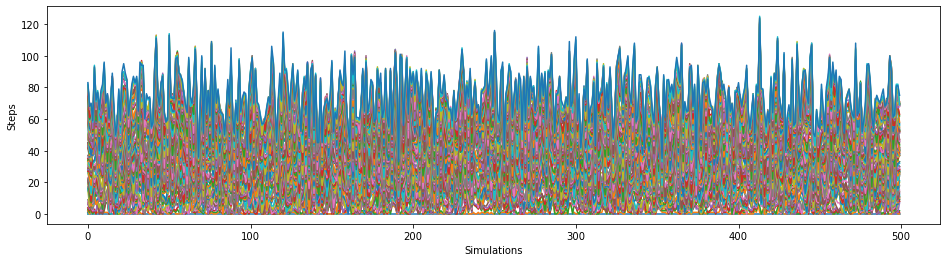

In [4]:
fig, ax = plt.subplots(1, figsize=(16,4))

# Visualize all walks 
plt.plot(all_walks)
plt.xlabel("Simulations")
plt.ylabel("Steps")
plt.show()

In [5]:
# Convert all_walks to Numpy array: np_aw

np_aw = np.array(all_walks)
print(np_aw.shape)
print(type(np_aw))

(500, 101)
<class 'numpy.ndarray'>


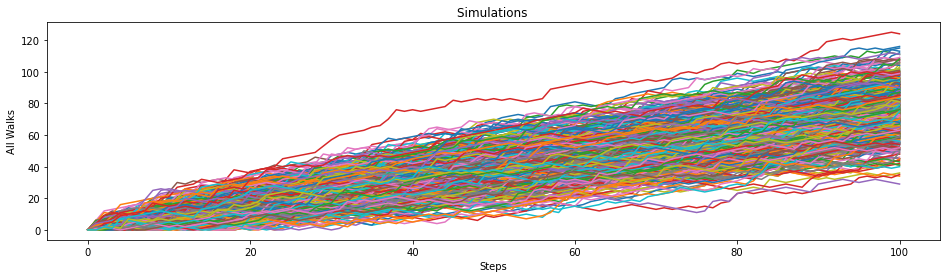

In [6]:
# Transpose np_aw as np_aw_t to correct the interpretation
np_aw_t = np.transpose(np_aw)

fig, ax = plt.subplots(1, figsize=(16,4))
# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.xlabel("Steps")
plt.ylabel("All Walks")
plt.title("Simulations ")
plt.show()

In [7]:
#  Shape before transpose
np_aw.shape

(500, 101)

In [8]:
#  Shape after transpose 
np_aw_t.shape

(101, 500)

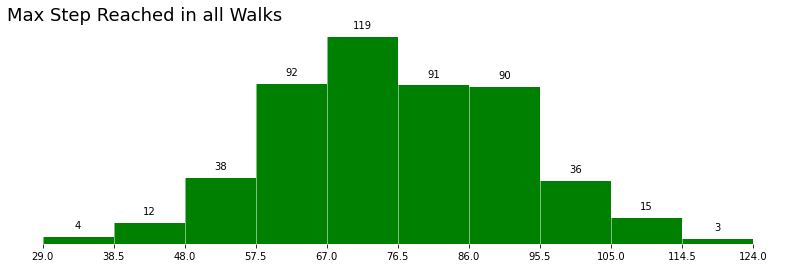

In [9]:
# Select last value of each walk as it shows the final step reached in each walk
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot

fig, ax = plt.subplots(1, figsize=(14,4))
n, bins, patches = plt.hist(ends, color='g')
plt.grid(color='white', lw = 0.5, axis='x')
plt.title('Max Step Reached in all Walks', fontsize = 18,loc='left')
plt.xticks(bins)

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.yticks([])


# plot values on top of bars
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')

plt.show()

## Estimated chance to Reach 60 steps

In [12]:
# Get number of simulations where we reached 60 or more steps
odds = len(ends[ends >= 60])
print("Simulations where we reached 60 or more steps: " + str(odds))

print("Possible Chances of Reaching the 60 Stairs: " + str((odds/len(ends)*100)) + "%")

Simulations where we reached 60 or more steps: 428
Possible Chances of Reaching the 60 Stairs: 85.6%
